In [1]:
#In this notebook we are going to generate visualizations like the fig 3 showed in the article paper https://arxiv.org/pdf/2112.09238.pdf
#Importing libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px


In [13]:
#importing the original and the synthetic data
original_data = pd.read_csv('Project/DataSets/Data_Adult/adult_original.csv', index_col=0)
AIM_data = pd.read_csv('Project/DataSets/Data_Adult/aim_samples_epsilon3.csv', index_col=0)
CopulaGAN_data = pd.read_csv('Project/DataSets/Data_Adult/CopulaGAN_samples.csv', index_col=0)
CTGAN_data = pd.read_csv('Project/DataSets/Data_Adult/CTGAN_samples.csv', index_col=0)
DPCTGAN_data = pd.read_csv('Project/DataSets/Data_Adult/DPCTGAN_samples_epsilon3.csv', index_col=0)
FASTML_data = pd.read_csv('Project/DataSets/Data_Adult/FASTML_samples.csv', index_col=0)
GaussianCopula_data = pd.read_csv('Project/DataSets/Data_Adult/GaussianCopula_samples.csv', index_col=0)
MST_data = pd.read_csv('Project/DataSets/Data_Adult/MST_samples_epsilon3.csv', index_col=0)
non_param_copula_data = pd.read_csv('Project/DataSets/Data_Adult/non_param_Copulas_samples.csv', index_col=0)
#preventing to have unnamed columns
PACSYNTH_data = pd.read_csv('Project/DataSets/Data_Adult/pacsynth_samples_epsilon3.csv', index_col=0)
PATECTGAN_data = pd.read_csv('Project/DataSets/Data_Adult/PATECTGAN_samples_epsilon3.csv', index_col=0)
TVAE_data = pd.read_csv('Project/DataSets/Data_Adult/TVAE_samples.csv', index_col=0)


In [83]:
datasets={}
attribute='label'
databases_names=['original_data','AIM_data','CopulaGAN_data','CTGAN_data','DPCTGAN_data','FASTML_data','GaussianCopula_data','MST_data','non_param_copula_data','PACSYNTH_data','PATECTGAN_data','TVAE_data']
for i in [original_data,AIM_data,CopulaGAN_data,CTGAN_data,DPCTGAN_data,FASTML_data,GaussianCopula_data,MST_data,non_param_copula_data,PACSYNTH_data,PATECTGAN_data,TVAE_data]:
    datasets[databases_names.pop(0)]=i[attribute].values

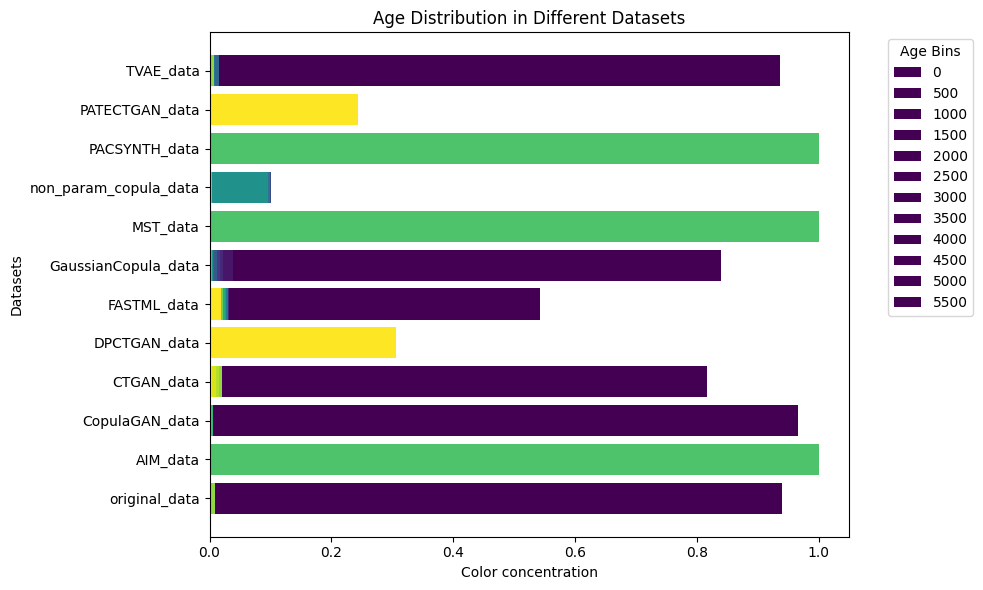

In [62]:

# Define  bins
age_bins = np.arange(0, 10000, 500)

# Initialize a matrix to store color concentrations
colors_matrix = np.zeros((len(datasets), len(age_bins) - 1))

# Calculate color concentrations for each dataset
for i, (dataset_name, dataset_age) in enumerate(datasets.items()):
    histogram, _ = np.histogram(dataset_age, bins=age_bins)
    colors_matrix[i] = histogram / np.sum(histogram)

# Plotting
plt.figure(figsize=(10, 6))

for i, dataset_name in enumerate(datasets.keys()):
    plt.barh(dataset_name, width=colors_matrix[i], color=plt.cm.viridis(np.linspace(0, 1, len(age_bins) - 1)))

# Customize plot
plt.xlabel('Color concentration')
plt.ylabel('Datasets')
plt.title('Age Distribution in Different Datasets')
plt.legend(age_bins[:-1], title='Age Bins', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Age bins')

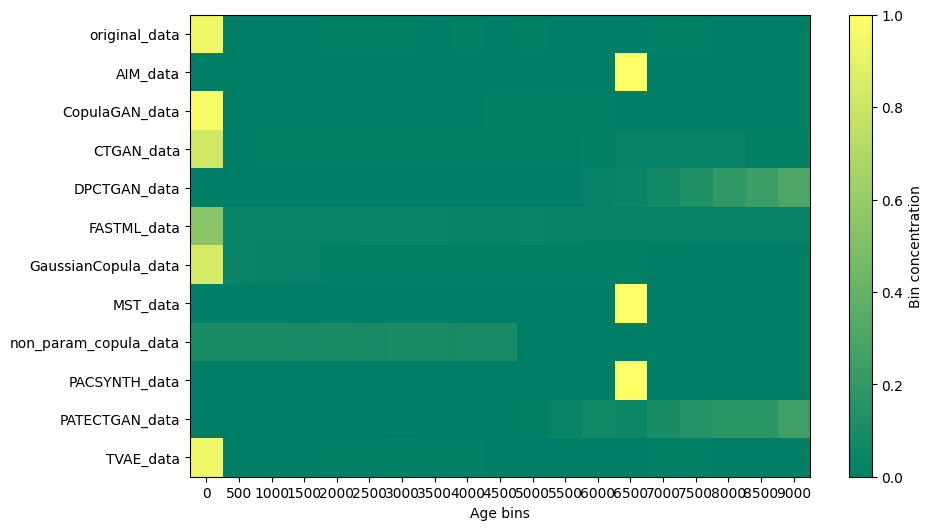

In [63]:
#colorploting the color matrix 
plt.figure(figsize=(10, 6))
plt.imshow(colors_matrix, cmap='summer', aspect='auto')
plt.colorbar(label='Bin concentration')
plt.yticks(range(len(datasets)), datasets.keys())
plt.xticks(range(len(age_bins) - 1), age_bins[:-1])
plt.xlabel('Age bins')

In [82]:
original_data['label'].unique()

array(['<=50K', '>50K'], dtype=object)

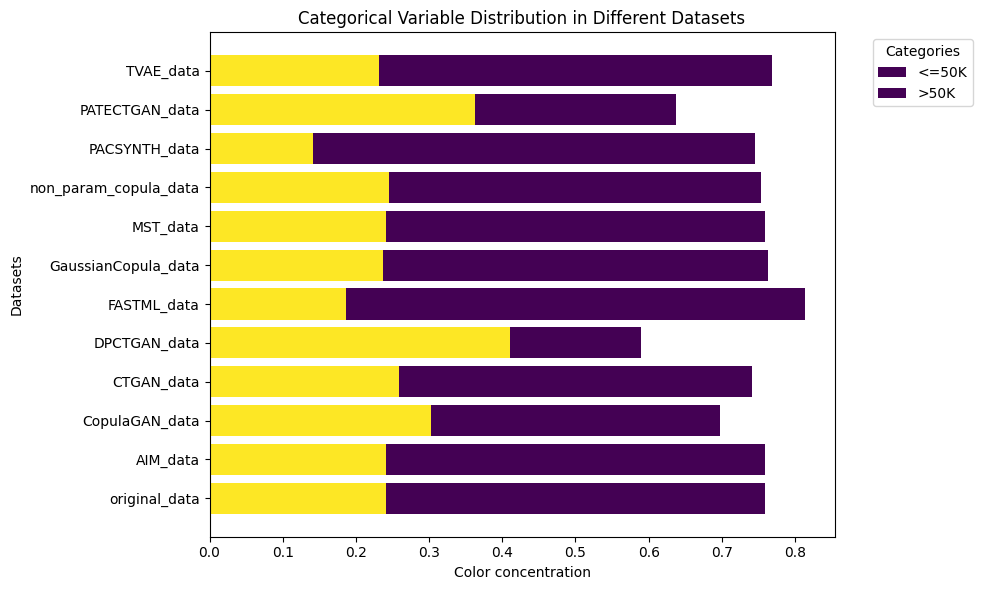

In [84]:
# Define categories
categories = ['<=50K', '>50K']

# Initialize a matrix to store color concentrations
colors_matrix = np.zeros((len(datasets), len(categories)))

# Calculate color concentrations for each dataset
for i, (dataset_name, dataset_categories) in enumerate(datasets.items()):
    for j, category in enumerate(categories):
        colors_matrix[i, j] = np.sum(dataset_categories == category) / len(dataset_categories)

# Plotting
plt.figure(figsize=(10, 6))

for i, dataset_name in enumerate(datasets.keys()):
    plt.barh(dataset_name, width=colors_matrix[i], color=plt.cm.viridis(np.linspace(0, 1, len(categories))))

# Customize plot
plt.xlabel('Color concentration')
plt.ylabel('Datasets')
plt.title('Categorical Variable Distribution in Different Datasets')
plt.legend(categories, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Sex bins')

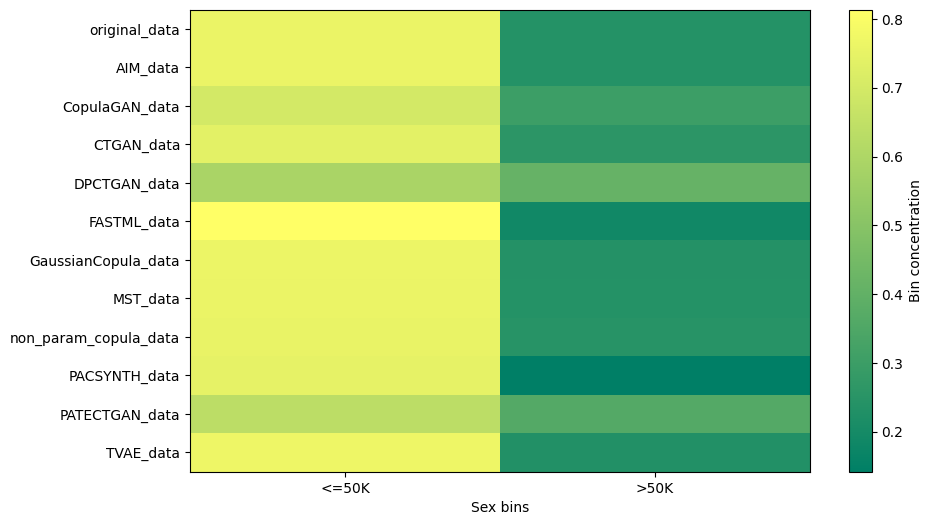

In [85]:
#colorploting the color matrix 
plt.figure(figsize=(10, 6))
plt.imshow(colors_matrix, cmap='summer', aspect='auto')
plt.colorbar(label='Bin concentration')
plt.yticks(range(len(datasets)), datasets.keys())
plt.xticks(range(len(categories) ), categories[:])
plt.xlabel('Sex bins')

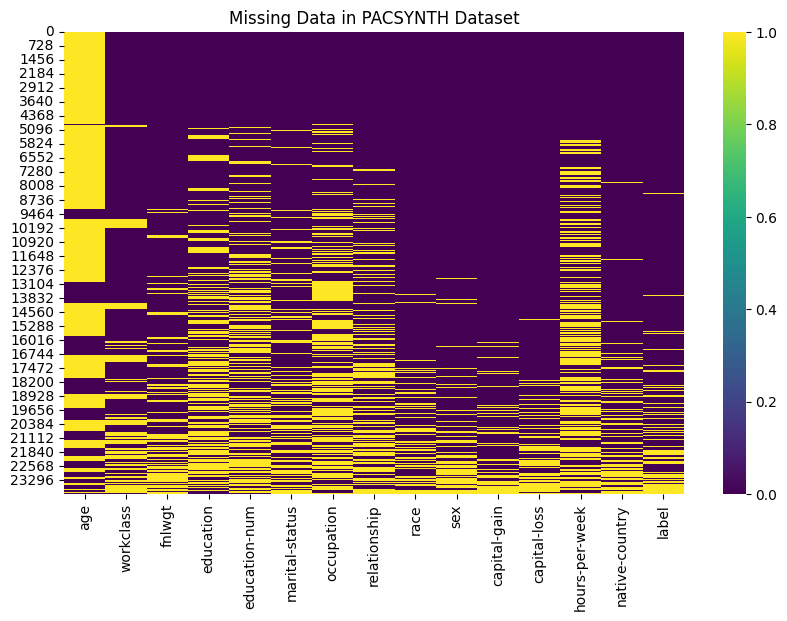

In [14]:
#Showind the missing data in pacsynth dataset
plt.figure(figsize=(10, 6))
sns.heatmap(PACSYNTH_data.isnull(), cmap='viridis')
plt.title('Missing Data in PACSYNTH Dataset')
plt.show()